<a href="https://colab.research.google.com/github/parth5757/pyhon_project/blob/main/watermark_remover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# !pip install opencv-python
# import cv2
# import numpy as np
# from google.colab import files
# import matplotlib.pyplot as plt  # Add this line to import matplotlib


In [12]:
# # Upload image with watermark
# uploaded = files.upload()
# image_path = list(uploaded.keys())[0]

In [11]:
# # Read and display the original image
# original_image = cv2.imread(image_path)
# original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
# plt.imshow(original_image)
# plt.axis('off')
# plt.show()


In [7]:
# def remove_watermark(image):
#     # This is a basic example; you may need more sophisticated techniques in real scenarios
#     # For simplicity, we'll just replace the watermark with a white region.
#     watermark_removed = image.copy()
#     watermark_removed[100:300, 100:300, :] = 255  # Replace a region with white color
#     return watermark_removed

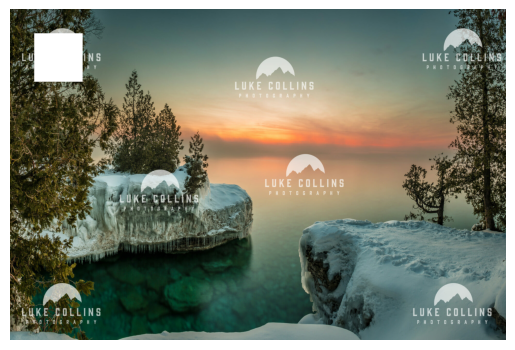

In [8]:
# # Apply watermark removal
# result_image = remove_watermark(original_image)

# # Display the result
# plt.imshow(result_image)
# plt.axis('off')
# plt.show()


In [10]:
# # Save the result image
# result_path = "/content/result_image.jpg"
# cv2.imwrite(result_path, cv2.cvtColor(result_image, cv2.COLOR_RGB2BGR))

# # Download the result image
# files.download(result_path)


In [ ]:
# Download the result image
files.download(result_path)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


In [3]:
def remove_watermark_inpainting(image, mask):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Inpaint using the mask
    result = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    return result

In [4]:
# Upload an image with a watermark
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving should-you-watermark-images-5.jpg to should-you-watermark-images-5 (1).jpg


In [5]:
# Read the image
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

In [6]:
# Create a mask (region containing the watermark)
# This is a simple example; you may need a more accurate mask based on your watermark's characteristics
mask = np.zeros((original_image.shape[0], original_image.shape[1]), dtype=np.uint8)
mask[100:300, 100:300] = 255  # Ensure the mask is 8-bit 1-channel

In [7]:
# Apply inpainting
result_image = remove_watermark_inpainting(original_image, mask)

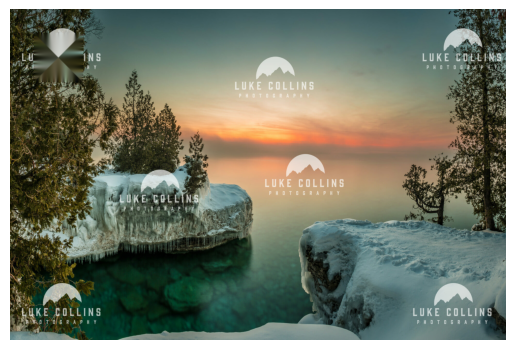

In [8]:
# Display the result
plt.imshow(result_image)
plt.axis('off')
plt.show()

In [10]:
# Save the result image
result_path = "/content/result_image.jpg"
cv2.imwrite(result_path, cv2.cvtColor(result_image, cv2.COLOR_RGB2BGR))

True

In [ ]:
# Download the result image
files.download(result_path)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def remove_watermark_inpainting(image, mask):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Inpaint using the mask
    result = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    return result

def detect_watermark(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply edge detection
    edges = cv2.Canny(gray, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on a black mask
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

    return mask

# Upload an image with watermarks
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Read the image
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Detect potential watermarks using contour detection
watermark_mask = detect_watermark(original_image)

# Apply inpainting for each potential watermark region
result_image = remove_watermark_inpainting(original_image, watermark_mask)

# Display the result
plt.imshow(result_image)
plt.axis('off')
plt.show()

# Save the result image
result_path = "/content/result_image.jpg"
cv2.imwrite(result_path, cv2.cvtColor(result_image, cv2.COLOR_RGB2BGR))

# Download the result image
files.download(result_path)
